## Python. Mini-project 2


1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

2. Какой клиент совершил больше всего успешных операций? (success == True)

3. С какой платформы осуществляется наибольшее количество успешных операций?

4. Какую платформу предпочитают премиумные клиенты?

5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

6. Постройте график распределения числа успешных операций

7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

### Описание данных
user_data:

- client – идентификатор пользователя
- premium – является ли клиент премиум
- age – возраст

logs:

- client – идентификатор пользователя
- success – результат (успех - 1, нет - 0)
- platform – платформа
- time – время в формате Unix

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# таблица с уникальными идентификаторами пользователей
df_users = pd.read_csv('./3_user_data.csv')
df_users.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [3]:
df_log = pd.read_csv('./3_logs.csv')
df_log.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [4]:
df_users.shape

(2954, 3)

In [5]:
df_log.shape

(4500, 4)

In [6]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [7]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs.
Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [8]:
#смотрим описательную статистику
df_log.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [9]:
df_users.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [10]:
df_log['platform'].unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [11]:
#Сколько уникальных значений принимает переменная platform?
df_log['platform'].nunique()

3

Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий,
перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания.

In [12]:
success_count = df_log.loc[df_log.success == True].client.value_counts()

In [13]:
success_count

28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: client, Length: 2845, dtype: int64

In [14]:
max_success = success_count.max()

In [15]:
max_success_users = success_count.loc[success_count == max_success]
max_success_users

28719    41
52870    41
61468    41
61473    41
12179    41
82563    41
36165    41
92584    41
78349    41
Name: client, dtype: int64

In [16]:
#вывести id списком
max_success_users.index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64')

С какой платформы осуществляется наибольшее количество успешных операций?

In [17]:
df_log.loc[df_log.success == True].platform.value_counts().idxmax()

'phone'

In [18]:
df_log.loc[df_log.success == True].platform.value_counts().max()

2019

Какая платформа наиболее популярна среди премиумных клиентов?

In [19]:
general_df = df_log.merge(df_users, on='client')
general_df.head(5)

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [20]:
general_df.loc[premium_logs.premium == True].platform.value_counts().idxmax()

NameError: name 'premium_logs' is not defined

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (обычный или премиум),
используя библиотеку seaborn с параметрами цвета по умолчанию. 

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

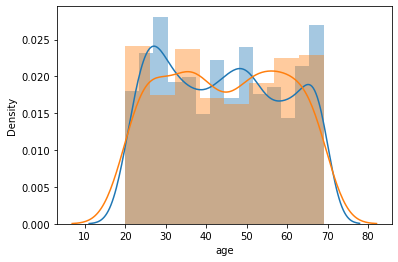

In [ ]:
sns.distplot(general_df.query('premium == False').age)
sns.distplot(general_df.query('premium == True').age)

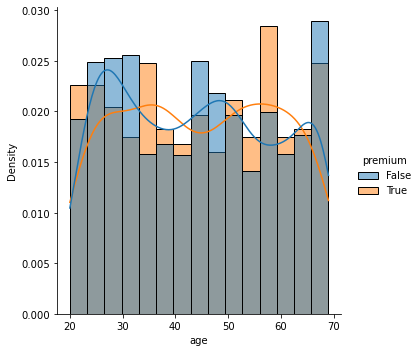

In [ ]:
sns.displot(data=general_df, x='age', hue='premium', kde=True, kind='hist', stat='density', common_norm=False)

Постройте график распределения числа успешных операций: 

- x – число успешных операций
- y – число клиентов, совершивших столько успешных операций

In [ ]:
success_count = df_log.loc[df_log.success == True].client.value_counts()

In [ ]:
success_count = success_count.rename('successes')

<AxesSubplot:xlabel='successes', ylabel='count'>

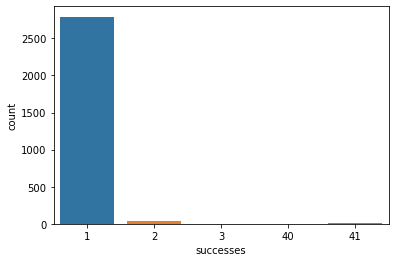

In [ ]:
sns.countplot(x=success_count)

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. 
Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

In [ ]:
df = general_df.query('platform == "computer" and success==True') 

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

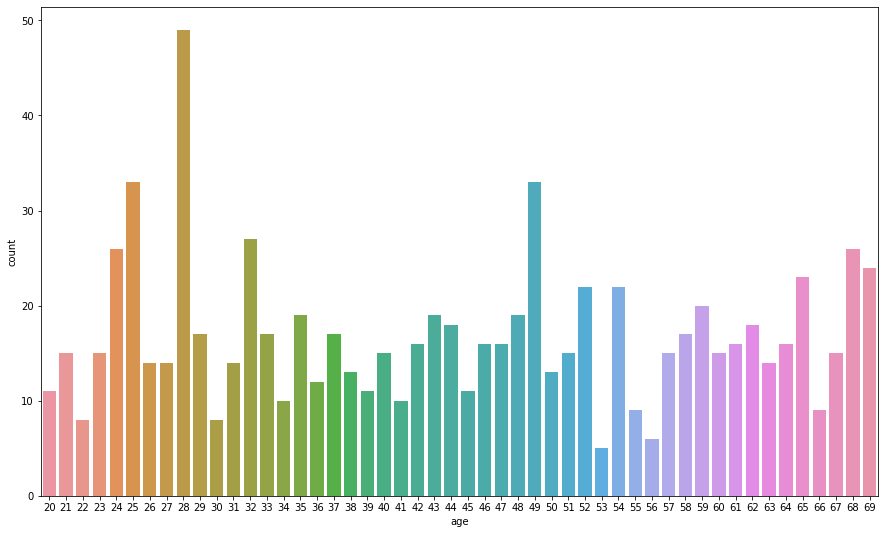

In [ ]:
plt.figure(figsize=(15, 9))
sns.countplot(df.age)